<a href="https://colab.research.google.com/github/samarth0174/research_work_pointcloud/blob/master/latestwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)
root_path = 'gdrive/My Drive/data1/'


Mounted at /content/gdrive


In [0]:
import numpy as np
import scipy.io
import pandas as pd
from sklearn.preprocessing import StandardScaler 


In [0]:

Z1=[]
P1=[]

for q in range(100,131):
  filname = root_path + str(q) + ".mat"
  #import
  mat = scipy.io.loadmat(filname)['Ftr']
  L1=list(mat)

  # LRFs
  for i in range(0,500):
    Z=[]
    for j in range(0,2):
      Z.append(L1[0][0][i][0][j])
    K=np.ndarray.tolist(np.asarray(Z))
    Z1.append(K)
  # print(Z1)

  # Neighbours
  for i in range(0,500):
    
    K=np.ndarray.tolist(np.asarray(L1[0][1][i][0]))
    P1.append(K)
  # print(P1)

  
  
    
  

In [0]:

for q in range(131,160):
  filname = root_path + str(q) + ".mat"
  #import
  mat = scipy.io.loadmat(filname)['Ftr']
  L1=list(mat)

  # LRFs
  for i in range(0,500):
    Z=[]
    for j in range(0,2):
      Z.append(L1[0][0][i][0][j])
    K=np.ndarray.tolist(np.asarray(Z))
    Z1.append(K)
  # print(Z1)

  # Neighbours
  for i in range(0,500):
    
    K=np.ndarray.tolist(np.asarray(L1[0][1][i][0]))
    P1.append(K)
  # print(P1)

  
  
    
  

In [15]:

P1=np.asarray(P1)
Z1=np.asarray(Z1)

print((Z1.shape))



(30000, 2, 3)


In [0]:
# f=root_path + "1.mat"
# mat = scipy.io.loadmat(f)['Ftr']
# L1=list(mat)
# Z=np.array(L1[0][1][0][0])
# #K=np.ndarray.tolist(Z)
# #P1.append(Z)
# P1=np.array(Z)
 

In [0]:


# P3=np.mean(P1,axis=0)
# print(P3)


In [0]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(P1,Z1,test_size=0.2,random_state=0)


In [0]:
# You will learn how to build very deep convolutional networks, using Residual Networks (ResNets)
# In theory, very deep networks can represent very complex functions; but in practice, they are hard to train. Residual Networks, introduced by He et al., allow you to train much deeper networks than were previously practically feasible.

# Let's import packages
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Dropout ,Activation, ZeroPadding1D, BatchNormalization, Flatten, Conv1D, AveragePooling1D, MaxPooling1D, GlobalMaxPooling1D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

# Identity block

def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv1D(filters = F1, kernel_size = 1, strides = 1, padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization( name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    
    # Second component of main path 
    X = Conv1D(filters = F2, kernel_size=(f), strides = (1), padding='same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization( name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv1D(filters = F3, kernel_size=(1), strides = 1, padding="valid", name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization( name=bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    
    return X





In [0]:
# import numpy as np
# import os
# import tensorflow as tf
# from keras import optimizers
# from keras.layers import Input
# from keras.models import Model
# from keras.layers import Dense, Flatten, Reshape, Dropout
# from keras.layers import Convolution1D, MaxPooling1D, BatchNormalization
# from keras.layers import Lambda
# from keras.utils import np_utils
# import h5py


# def mat_mul(A, B):
#     return tf.matmul(A, B)


# def load_h5(h5_filename):
#     f = h5py.File(h5_filename)
#     data = f['data'][:]
#     label = f['label'][:]
#     return (data, label)


# def rotate_point_cloud(batch_data):
#     """ Randomly rotate the point clouds to augument the dataset
#         rotation is per shape based along up direction
#         Input:
#           BxNx3 array, original batch of point clouds
#         Return:
#           BxNx3 array, rotated batch of point clouds
#     """
#     rotated_data = np.zeros(batch_data.shape, dtype=np.float32)
#     for k in range(batch_data.shape[0]):
#         rotation_angle = np.random.uniform() * 2 * np.pi
#         cosval = np.cos(rotation_angle)
#         sinval = np.sin(rotation_angle)
#         rotation_matrix = np.array([[cosval, 0, sinval],
#                                     [0, 1, 0],
#                                     [-sinval, 0, cosval]])
#         shape_pc = batch_data[k, ...]
#         rotated_data[k, ...] = np.dot(shape_pc.reshape((-1, 3)), rotation_matrix)
#     return rotated_data



In [0]:

def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv1D(filters = F1, kernel_size= (1), strides = s,padding="valid", name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization( name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    

    # Second component of main path 
    X = Conv1D(filters = F2, kernel_size=(f), strides=(1), name = conv_name_base + '2b', padding="same",kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization( name= bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv1D(filters = F3, kernel_size=(1), strides = (1), name= conv_name_base + '2c',padding="valid", kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization( name=bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv1D(filters = F3, kernel_size= (1), strides=(s), name=conv_name_base + '1', padding="valid", kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization( name=bn_name_base+'1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X_shortcut,X])
    X = Activation("relu")(X)
    
    
    return X



In [10]:
#def ResNet50():
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV1D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER
    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes
    Returns:
    model -- a Model() instance in Keras
    """
X_input=Input(shape=(1499,3))

    
    # Zero-Padding
X = ZeroPadding1D((3))(X_input)
    
    # Stage 1
X = Conv1D(64, (7), strides = (2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
X = BatchNormalization(name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling1D((4), strides=(4))(X)

    # Stage 2
X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s=1)
X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    # Stage 3
X = convolutional_block(X, f=3, filters = [128,128,512], stage = 3, block='a', s=2)
X = identity_block(X, 3, filters = [128,128,512],stage=3, block='b')
X = identity_block(X, 3, filters = [128,128,512], stage=3, block='c')
X = identity_block(X, 3, filters = [128,128,512], stage =3, block='d')
X = AveragePooling1D((4), name='avg_pool0')(X)
    


    # Stage 4 
X = convolutional_block(X, f=3, filters = [256,256,1024],stage=4, block='a', s=2)
X = identity_block(X, 3, filters = [256,256,1024], stage=4, block='b')
X = identity_block(X, 3, filters = [256, 256, 1024], stage=4, block='c')
X = identity_block(X, 3, filters= [256,256,1024], stage=4, block='d')
X = identity_block(X, 3, filters=[256,256,1024], stage=4, block='e')
X = identity_block(X, 3, filters=[256,256,1024], stage=4, block='f')

    # Stage 5 
X = convolutional_block(X, f=3, filters=[256,256,2048], stage=5,block='a', s=3)
X = identity_block(X, 3, filters=[256,256,2048], stage=5, block='b')
X = identity_block(X,3, filters=[256,256,2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling1D(...)(X)"
X = AveragePooling1D((2), name='avg_pool')(X)
    
#X=Dropout(0.38)(X)
    # output layer
   # X = Flatten()(X)
X = Dense(3, activation='linear', name='fc' + str(3), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
model = Model(inputs = X_input, outputs = X, name='ResNet50')




    # Define the input as a tensor with shape input_shape
   
   # return model

Instructions for updating:
Colocations handled automatically by placer.


In [17]:

# Run the following code to build the model's graph. If your implementation is not correct you will know it by checking your accuracy when running model.fit(...) below.
#model = ResNet50()
from keras.callbacks import EarlyStopping
model.compile(loss='cosine_proximity', optimizer='adam',metrics=['accuracy'])
model.summary()



# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(x_train, y_train,batch_size=64,epochs=150,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_train, y_train, verbose=0)
trainerr = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
print('Test loss:',trainerr[0])
print('Test accuracy:',trainerr[1])


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1499, 3)      0                                            
__________________________________________________________________________________________________
zero_padding1d_1 (ZeroPadding1D (None, 1505, 3)      0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv1D)                  (None, 750, 64)      1408        zero_padding1d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 750, 64)      256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
model.save_weights('normalweights_change1.h5')
    

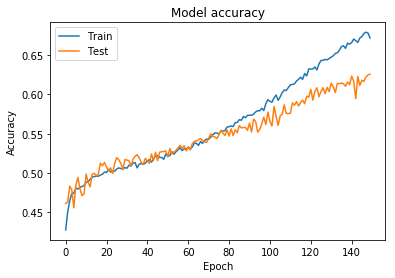

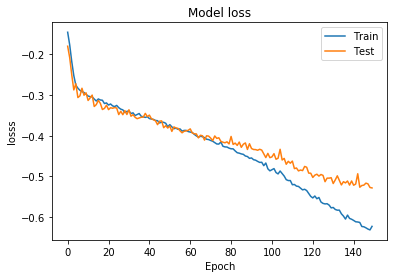

In [20]:

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('losss')
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

